In [232]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [233]:
df = pd.read_csv("match_df.csv")

In [234]:
df = df.drop("Unnamed: 0",axis = 1)
df = df.drop("Unnamed: 0.1",axis = 1)

In [235]:
df

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win
0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.042430,0.000000,0.546448,0.537634,0.518135,120,1
1,12774,Camila Giorgi,Lara Arruabarrena,2015.0,7.0,2.0,-53.0,-0.019485,0.000000,0.900901,0.892857,0.877193,120,1
2,12775,Olga Govortsova,Alize Cornet,2015.0,7.0,2.0,95.0,0.028840,0.000000,0.476191,0.465116,0.444444,120,1
3,12776,Jelena Jankovic,Evgeniya Rodina,2015.0,7.0,2.0,-71.0,-0.023432,0.000000,0.819672,0.813008,0.793651,120,1
4,12777,Angelique Kerber,Anastasia Pavlyuchenkova,2015.0,7.0,2.0,-32.0,-0.076190,0.000000,0.862069,0.877193,0.847458,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0
20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0
20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431034,0.408163,70,0
20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1


In [78]:
df.head(1)

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win
0,12773,Casey Dellacqua,Elina Svitolina,2015.0,7.0,2.0,44.0,0.04243,0.0,0.546448,0.537634,0.518135,120,1


In [16]:
player = "Elina Svitolina"
year = 2015
month = 7
monthly = pd.read_csv("players 2014-2022/Elina Svitolina.csv")
daily = pd.read_csv("players/Elina Svitolina/2015_7_Elina Svitolina.csv")

In [30]:
monthly["date"] = pd.to_datetime(monthly["date"])
monthly.loc[monthly["date"]=="2015-07-01"]

,date,Elina Svitolina,isPartial
18,2015-07-01,2,False


In [36]:
monthly = monthly[monthly["date"]<="2015-07-01"]
monthly = monthly[monthly["date"]>="2014-07-01"]
max_month = monthly["Elina Svitolina"].max()
month_scaler = 100/max_month
monthly["Elina Svitolina"] = monthly["Elina Svitolina"]*month_scaler
monthly

,date,Elina Svitolina,isPartial
6,2014-07-01,33.333333,False
7,2014-08-01,33.333333,False
8,2014-09-01,33.333333,False
9,2014-10-01,25.000000,False
10,2014-11-01,8.333333,False
11,2014-12-01,0.000000,False
12,2015-01-01,75.000000,False
13,2015-02-01,33.333333,False
14,2015-03-01,25.000000,False
15,2015-04-01,25.000000,False


In [70]:
daily = pd.read_csv("players/Elina Svitolina/2015_7_Elina Svitolina.csv")
daily_mean = daily["Elina Svitolina"].mean()
daily_scaler = float(monthly.loc[monthly["date"]=="2015-07-01"]["Elina Svitolina"])/daily_mean
daily["Elina Svitolina"] = daily["Elina Svitolina"]*daily_scaler
daily

,date,Elina Svitolina,isPartial
0,2015-07-01,38.492480,False
1,2015-07-02,42.829661,False
2,2015-07-03,41.745366,False
3,2015-07-04,33.071004,False
4,2015-07-05,17.890871,False
5,2015-07-06,0.000000,False
6,2015-07-07,35.781742,False
7,2015-07-08,0.000000,False
8,2015-07-09,0.000000,False
9,2015-07-10,0.000000,False


In [131]:
player = "Casey Dellacqua"
year = 2015
month = 7
monthly = pd.read_csv("players 2014-2022/Casey Dellacqua.csv")
daily = pd.read_csv("players/Casey Dellacqua/2015_7_Casey Dellacqua.csv")
monthly["date"] = pd.to_datetime(monthly["date"])
monthly.loc[monthly["date"]=="2015-07-01"]
monthly = monthly[monthly["date"]<="2015-07-01"]
monthly = monthly[monthly["date"]>="2014-07-01"]
max_month = monthly["Casey Dellacqua"].max()
#print(max_month)
month_scaler = 100/max_month
monthly["Casey Dellacqua"] = monthly["Casey Dellacqua"]*month_scaler
#print(monthly)
daily = pd.read_csv("players/Casey Dellacqua/2015_7_Casey Dellacqua.csv")
daily_mean = daily["Casey Dellacqua"].mean()
print(daily_mean)
daily_scaler = float(monthly.loc[monthly["date"]=="2015-07-01"]["Casey Dellacqua"])/daily_mean
daily["Casey Dellacqua"] = daily["Casey Dellacqua"]*daily_scaler
daily["Casey Dellacqua"][0]

8.774193548387096


43.60613810741688

In [81]:
np.log(43.606138) - np.log(38.492480)

0.12473502272288917

## Test

In [236]:
test = df
test[test["year"]==2020]

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win
20324,2265,Ekaterina Alexandrova,Katerina Siniakova,2020.0,1.0,5.0,-21.0,-0.011230,0.403195,0.666667,0.657895,0.636943,99,1
20325,2266,Kateryna Bondarenko,Misaki Doi,2020.0,1.0,5.0,1088.0,0.011644,0.390198,0.381679,0.367647,0.344828,99,1
20326,2267,Elise Mertens,Lesia Tsurenko,2020.0,1.0,5.0,-102.0,-0.050420,-0.521773,0.847458,0.833333,0.806452,99,1
20327,2269,Yafan Wang,Sara Sorribes Tormo,2020.0,1.0,5.0,-40.0,-0.008889,-0.159065,0.714286,0.684931,0.662252,99,1
20328,2270,Zhang Shuai,Magda Linette,2020.0,1.0,5.0,-5.0,-0.003060,0.270875,0.602410,0.609756,0.581395,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20927,4139,Ekaterina Alexandrova,Kiki Bertens,2020.0,2.0,15.0,20.0,0.089286,1.323982,0.500000,0.483092,0.454545,70,0
20928,4141,Patricia Maria Tig,Magda Linette,2020.0,2.0,15.0,63.0,0.014286,-0.517943,0.381679,0.396825,0.378788,108,0
20929,4142,Maria Sakkari,Elena Rybakina,2020.0,2.0,15.0,-4.0,-0.007619,-1.612937,0.421941,0.431034,0.408163,70,0
20930,4143,Kiki Bertens,Elena Rybakina,2020.0,2.0,16.0,-17.0,-0.085000,-2.935837,0.636943,0.641026,0.621118,70,1


In [237]:
missing_players = []
for player,opponent,year,month,day,win in zip(test["player"],test["opponent"],test["year"],test["month"],test["day"],test["win"]):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        missing_players.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        missing_players.append(tuple([opponent,year,month]))
missing_players  

[]

In [238]:
missing_player_monthly = []
for player,opponent,year,month,day,win in zip(test["player"],test["opponent"],test["year"],test["month"],test["day"],test["win"]):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    try:
        player_daily = pd.read_csv("players 2014-2022/{}.csv".format(player))
    except:
        missing_player_monthly.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    except:
        missing_player_monthly.append(tuple([opponent,year,month]))
missing_player_monthly

[]

In [228]:
missing = pd.DataFrame(missing_players)
missing = missing.drop_duplicates()
missing.to_csv("missing_values.csv")
missing

,0,1,2
0,Petra Cetkovska,2015,8
1,Mayo Hibi,2015,8
2,Lourdes Domínguez Lino,2015,8
3,Johanna Larsson,2015,8
4,Marina Erakovic,2015,8
...,...,...,...
395,Anastasia Potapova,2019,6
396,Jil Teichmann,2019,6
397,Anna Karolina Schmiedlova,2019,6
398,Kristie Ahn,2019,6


In [239]:
from calendar import monthrange

def CalculateGoogleBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    if win == 1:
        GoogleBuzz = np.log(player_GB) - np.log(opponent_GB)
    else:
        GoogleBuzz = np.log(opponent_GB) - np.log(player_GB)
    return(GoogleBuzz)

In [240]:
def RevisedGoogleBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    if win == 1:
        GoogleBuzz = (player_GB) - (opponent_GB)
    else:
        GoogleBuzz = (opponent_GB) - (player_GB)
    return(GoogleBuzz)

In [231]:
missing_players = []
for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"])):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        missing_players.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        missing_players.append(tuple([opponent,year,month]))
missing_players

players/Alize Cornet/2017_12_Alize Cornet.csv
players/Elena Vesnina/2017_12_Elena Vesnina.csv
players/Misaki Doi/2017_12_Misaki Doi.csv
players/Ekaterina Makarova/2017_12_Ekaterina Makarova.csv
players/Daria Kasatkina/2017_12_Daria Kasatkina.csv
players/Irina-Camelia Begu/2017_12_Irina-Camelia Begu.csv
players/Vania King/2017_12_Vania King.csv
players/Maria Sakkari/2017_12_Maria Sakkari.csv
players/Christina McHale/2017_12_Christina McHale.csv
players/Sara Errani/2017_12_Sara Errani.csv
players/Kurumi Nara/2017_12_Kurumi Nara.csv
players/Antonia Lottner/2017_12_Antonia Lottner.csv
players/Tsvetana Pironkova/2017_12_Tsvetana Pironkova.csv
players/Galina Voskoboeva/2017_12_Galina Voskoboeva.csv
players/Karolina Pliskova/2017_12_Karolina Pliskova.csv
players/Yulia Putintseva/2017_12_Yulia Putintseva.csv
players/Shelby Rogers/2017_12_Shelby Rogers.csv
players/Eugenie Bouchard/2017_12_Eugenie Bouchard.csv
players/Lucie Safarova/2017_12_Lucie Safarova.csv
players/Denisa Allertova/2017_12_Den

players/Roberta Vinci/2018_1_Roberta Vinci.csv
players/Roberta Vinci/2018_1_Roberta Vinci.csv
players/Stefanie Voegele/2018_2_Stefanie Voegele.csv
players/Stefanie Voegele/2018_2_Stefanie Voegele.csv
players/Denisa Allertova/2018_4_Denisa Allertova.csv
players/Patty Schnyder/2018_4_Patty Schnyder.csv
players/Paula Badosa/2018_4_Paula Badosa.csv
players/Fiona Ferro/2018_4_Fiona Ferro.csv
players/Alexandra Dulgheru/2018_4_Alexandra Dulgheru.csv
players/Dominika Cibulkova/2018_4_Dominika Cibulkova.csv
players/Bethanie Mattek-Sands/2018_4_Bethanie Mattek-Sands.csv
players/Kristina Kucova/2018_4_Kristina Kucova.csv
players/Elena-Gabriela Ruse/2018_4_Elena-Gabriela Ruse.csv
players/Tamara Zidansek/2018_4_Tamara Zidansek.csv
players/Patty Schnyder/2018_4_Patty Schnyder.csv
players/Denisa Allertova/2018_4_Denisa Allertova.csv
players/Fiona Ferro/2018_4_Fiona Ferro.csv
players/Paula Badosa/2018_4_Paula Badosa.csv
players/Alexandra Dulgheru/2018_4_Alexandra Dulgheru.csv
players/Dominika Cibulkov

[('Alize Cornet', 2017, 12),
 ('Elena Vesnina', 2017, 12),
 ('Misaki Doi', 2017, 12),
 ('Ekaterina Makarova', 2017, 12),
 ('Daria Kasatkina', 2017, 12),
 ('Irina-Camelia Begu', 2017, 12),
 ('Vania King', 2017, 12),
 ('Maria Sakkari', 2017, 12),
 ('Christina McHale', 2017, 12),
 ('Sara Errani', 2017, 12),
 ('Kurumi Nara', 2017, 12),
 ('Antonia Lottner', 2017, 12),
 ('Tsvetana Pironkova', 2017, 12),
 ('Galina Voskoboeva', 2017, 12),
 ('Karolina Pliskova', 2017, 12),
 ('Yulia Putintseva', 2017, 12),
 ('Shelby Rogers', 2017, 12),
 ('Eugenie Bouchard', 2017, 12),
 ('Lucie Safarova', 2017, 12),
 ('Denisa Allertova', 2017, 12),
 ('Qiang Wang', 2017, 12),
 ('Evgeniya Rodina', 2017, 12),
 ('Elena Vesnina', 2017, 12),
 ('Alize Cornet', 2017, 12),
 ('Ekaterina Makarova', 2017, 12),
 ('Misaki Doi', 2017, 12),
 ('Irina-Camelia Begu', 2017, 12),
 ('Daria Kasatkina', 2017, 12),
 ('Maria Sakkari', 2017, 12),
 ('Vania King', 2017, 12),
 ('Sara Errani', 2017, 12),
 ('Christina McHale', 2017, 12),
 ('Ant

In [241]:
test = df
test["googlebuzz"] = [RevisedGoogleBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"]))]

TypeError: cannot convert the series to <class 'float'>

In [ ]:
test["originalgooglebuzz"] = [CalculateGoogleBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"]))]

In [183]:
test
test.isna().sum()

match_id                 0
player                   0
opponent                 0
year                     0
month                    0
day                      0
rankdiff                 0
rankdist                 0
wikibuzz                 0
inv_bet365               0
inv_avg                  0
inv_max                  0
encoded_tournament       0
win                      0
googlebuzz            2912
dtype: int64

In [199]:
x=test
x.replace([np.inf, -np.inf], 0, inplace=True)
x.isna().sum()

match_id                 0
player                   0
opponent                 0
year                     0
month                    0
day                      0
rankdiff                 0
rankdist                 0
wikibuzz                 0
inv_bet365               0
inv_avg                  0
inv_max                  0
encoded_tournament       0
win                      0
googlebuzz            2912
dtype: int64

In [200]:
x = x.dropna(axis=0)
google_df = x
google_df.loc[google_df["googlebuzz"]==0]

,match_id,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz
45,12797,Olga Govortsova,Magdalena Rybarikova,2015.0,7.0,4.0,57.0,0.007188,0.000000,0.434783,0.442478,0.420168,120,1,0.0
53,12797,Magdalena Rybarikova,Olga Govortsova,2015.0,7.0,4.0,-57.0,-0.007188,0.000000,0.621118,0.613497,0.571429,120,0,0.0
93,12823,Samantha Stosur,Julia Glushko,2015.0,7.0,13.0,-128.0,-0.036856,-0.410887,0.909091,0.917431,0.900901,29,1,0.0
98,12823,Julia Glushko,Samantha Stosur,2015.0,7.0,13.0,128.0,0.036856,0.410887,0.142857,0.137931,0.111111,29,0,0.0
104,12830,Olga Govortsova,Anett Kontaveit,2015.0,7.0,14.0,-76.0,-0.005976,-1.338991,0.694444,0.689655,0.666667,29,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20289,20239,Ana Bogdan,Anastasia Pavlyuchenkova,2019.0,12.0,30.0,34.0,0.010652,0.132060,0.333333,0.316456,0.294118,99,0,0.0
20290,20240,Zarina Diyas,Evgeniya Rodina,2019.0,12.0,30.0,18.0,0.002849,-0.043485,0.735294,0.719425,0.694444,99,0,0.0
20291,20242,Luksika Kumkhum,Vera Zvonareva,2019.0,12.0,30.0,-43.0,-0.005977,-0.306258,0.621118,0.613497,0.578035,99,0,0.0
20296,20249,Harriet Dart,Priscilla Hon,2019.0,12.0,31.0,-8.0,-0.000342,0.607586,0.653595,0.653595,0.636943,22,1,0.0


In [238]:
    monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    monthly["date"] = pd.to_datetime(monthly["date"])
    monthly.loc[monthly["date"]=="{}-{}-01".format(year,month)]
    monthly = monthly[monthly["date"]<="{}-{}-01".format(year,month)]
    monthly = monthly[monthly["date"]>="{}-{}-01".format(prev_year,month)]
    max_month = monthly["{}".format(player)].max()
    month_scaler = 100/max_month
    monthly["{}".format(player)] = monthly["{}".format(player)]*month_scaler
    daily["date"] = pd.to_datetime(daily["date"])
    daily_mean = daily["{}".format(player)].mean()
    daily_scaler = float(monthly.loc[monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/daily_mean
    daily["{}".format(player)] = daily["{}".format(player)]*daily_scaler
    player_GB = float(daily.loc[daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])

In [188]:
daily = pd.read_csv("players/Lourdes Domínguez Lino/2015_7_Lourdes Domínguez Lino.csv")
type(daily)

pandas.core.frame.DataFrame

## Google vs Wiki

In [263]:
google_df["wikibuzz"].describe()

count    11988.000000
mean        -0.000050
std          1.447526
min         -6.931947
25%         -0.884943
50%          0.000000
75%          0.884943
max          6.931947
Name: wikibuzz, dtype: float64

In [264]:
google_df["googlebuzz"].describe()

count    11988.000000
mean        -0.186864
std          1.173007
min         -5.093862
25%         -0.409288
50%          0.000000
75%          0.000000
max          5.269552
Name: googlebuzz, dtype: float64

In [265]:
google_df["googlebuzz"].corr(df["wikibuzz"])

-1.0956425534267081e-06

## Betting time

In [96]:
def probability(const_p,odds_p,rankdist_p,wikibuzz_p,year_p,tournament_p,odds,rankdist,wikibuzz,google_p = 0,googlebuzz = 0): #to be used in conjuncture with a df
    return(const_p + (odds_p)*odds + rankdist_p*rankdist + wikibuzz_p*wikibuzz + google_p*googlebuzz)

def kelly_crit(probability,inv_odds):
               return(max((probability-((1-probability)/((1/inv_odds) - 1)),0)))
    
def profit(kelly,inv_odds,win):
    decimal_odds = 1/inv_odds
    if win == 1: #match won
        return(kelly*decimal_odds - kelly) #profits - inital investment
    elif win == 0: #match lost
        return(-kelly) # - initial investment

In [97]:
from linearmodels import PanelOLS

In [98]:
google_df = df

In [99]:
#google_df[google_df["player"]=="Polona Hercog"]
#google_df.loc[google_df["match_id"]==5883]
google_df = google_df.drop(16750,axis = 0)
google_df = google_df.drop(16762,axis = 0)

In [212]:
train_data = google_df[google_df["year"]<2019]
test_data = google_df[google_df["year"]>=2019]
#train_data = train_data.set_index(['match_id'], append=True)
#test_data = test_data.set_index(['match_id'], append=True)

In [213]:
test_data = test_data.dropna()
test_data[test_data["match_id"]==5883]
test_data = test_data.drop(16916, axis = 0)
test_data = test_data.drop(16928, axis = 0)
test_data = test_data.drop(20183, axis = 0)



In [214]:
train_data = train_data.set_index(['match_id'], append=True)
test_data = test_data.set_index(['match_id'], append=True)

## Original Models but with GoogleBuzz


no of bets: 95
profit: 0.0523508684591617
Mean overround (%): 5.325126575747574
count    4082.000000
mean        0.000010
std         0.008278
min        -0.062366
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.229025
Name: profit, dtype: float64
ROI (%): 1.5695840346090728


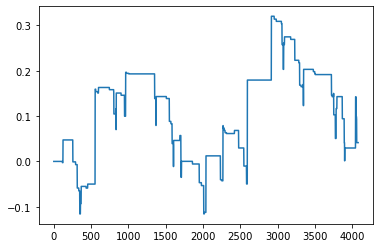

In [218]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False)
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_avg"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 1606
profit: 1.6900666631141672
Mean overround (%): -0.15068411827198203
count    4082.000000
mean        0.000328
std         0.028862
min        -0.201700
25%         0.000000
50%         0.000000
75%         0.000000
max         0.492769
Name: profit, dtype: float64
ROI (%): 3.6497692938258774


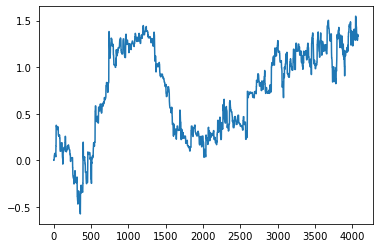

In [217]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_max"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 127
profit: -0.3541665894974328
Mean overround (%): 6.465301834885562
count    4082.000000
mean       -0.000069
std         0.008644
min        -0.081169
25%        -0.000000
50%         0.000000
75%         0.000000
max         0.223581
Name: profit, dtype: float64
ROI (%): -8.98651588675553


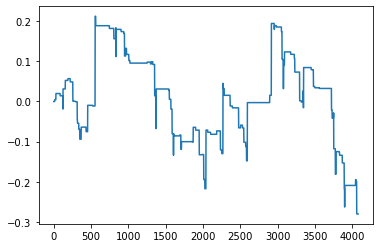

In [216]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 43
profit: -0.09779277712115002
Mean overround (%): 6.465301834885562
count    4082.000000
mean       -0.000019
std         0.001290
min        -0.033405
25%         0.000000
50%         0.000000
75%         0.000000
max         0.036538
Name: profit, dtype: float64
ROI (%): -25.5340380810122


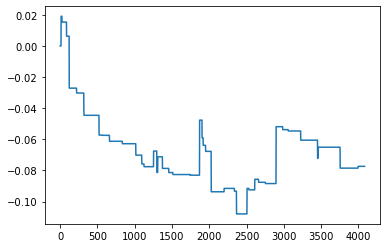

In [215]:
exog_vars = train_data[["inv_avg","googlebuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["googlebuzz"],0,0,odds,rankdist,wikibuzz) for odds,rankdist,wikibuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
print("Mean overround (%): "+str((test_data.sort_values(by="match_id")["inv_bet365"].rolling(2).sum()[1::2].mean()-1)*100))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))

In [211]:
test_data.sort_values("profit")

,,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,avg_prob,kelly,profit
,match_id,,,,,,,,,,,,,,,,,
15978,2063,Madison Brengle,Alison Van Uytvanck,2019.0,1.0,8.0,38.0,0.008372,-1.047331,0.454545,0.500000,0.444444,49,0,0.000000,0.472767,0.033405,-0.033405
18000,10148,Veronika Kudermetova,Kaia Kanepi,2019.0,5.0,31.0,-20.0,-0.003342,1.052582,0.421941,0.462963,0.414938,40,0,-33.255876,0.436947,0.025960,-0.025960
18343,12072,Yulia Putintseva,Kiki Bertens,2019.0,6.0,25.0,35.0,0.224359,1.469051,0.285714,0.317460,0.280899,36,0,-68.339950,0.296159,0.014623,-0.014623
17271,7598,Cagla Buyukakcay,Svetlana Kuznetsova,2019.0,4.0,23.0,158.0,0.006298,1.328187,0.181818,0.210970,0.178571,56,0,0.000000,0.193050,0.013728,-0.013728
16441,3982,Fatma Al Nabhani,Kristina Mladenovic,2019.0,2.0,17.0,339.0,0.012462,-0.263417,0.047619,0.073206,0.047619,35,0,17.753623,0.059712,0.012698,-0.012698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,13846,Danielle Collins,Anastasija Sevastova,2019.0,7.0,3.0,22.0,0.053922,0.382699,0.266667,0.291545,0.266667,120,1,-14.711864,0.271039,0.005963,0.016398
15855,2006,Ajla Tomljanovic,Johanna Konta,2019.0,1.0,2.0,9.0,0.005288,-2.318236,0.307692,0.335570,0.307692,22,1,97.999805,0.313563,0.008480,0.019081
17844,10071,Aliona Bolsova,Vera Zvonareva,2019.0,5.0,27.0,59.0,0.005521,4.553877,0.500000,0.546448,0.487805,40,1,45.857988,0.517684,0.035368,0.035368


,,player,opponent,year,month,day,rankdiff,rankdist,wikibuzz,inv_bet365,inv_avg,inv_max,encoded_tournament,win,googlebuzz,avg_prob,kelly,profit
,match_id,,,,,,,,,,,,,,,,,
18000,10148,Veronika Kudermetova,Kaia Kanepi,2019.0,5.0,31.0,-20.0,-0.003342,1.052582,0.421941,0.462963,0.414938,40,0,-1.212894,0.437662,0.027197,-0.027197
18343,12072,Yulia Putintseva,Kiki Bertens,2019.0,6.0,25.0,35.0,0.224359,1.469051,0.285714,0.317460,0.280899,36,0,-1.558097,0.297987,0.017182,-0.017182
16441,3982,Fatma Al Nabhani,Kristina Mladenovic,2019.0,2.0,17.0,339.0,0.012462,-0.263417,0.047619,0.073206,0.047619,35,0,0.000000,0.063301,0.016466,-0.016466
19530,18175,Varvara Flink,Sara Sorribes Tormo,2019.0,9.0,12.0,68.0,0.005229,1.169106,0.307692,0.337838,0.303030,60,0,0.000000,0.317397,0.014018,-0.014018
17877,10078,Viktorija Golubic,Su-Wei Hsieh,2019.0,5.0,27.0,54.0,0.027342,0.875469,0.312500,0.342466,0.312500,40,0,0.000000,0.321841,0.013586,-0.013586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,13846,Danielle Collins,Anastasija Sevastova,2019.0,7.0,3.0,22.0,0.053922,0.382699,0.266667,0.291545,0.266667,120,1,0.000000,0.272947,0.008565,0.023552
15855,2006,Ajla Tomljanovic,Johanna Konta,2019.0,1.0,2.0,9.0,0.005288,-2.318236,0.307692,0.335570,0.307692,22,1,0.000000,0.315220,0.010873,0.024465
17844,10071,Aliona Bolsova,Vera Zvonareva,2019.0,5.0,27.0,59.0,0.005521,4.553877,0.500000,0.546448,0.487805,40,1,0.000000,0.517702,0.035404,0.035404


## Combined Models


no of bets: 156
profit: -0.13407575244321038
count    4082.000000
mean       -0.000026
std         0.006924
min        -0.063932
25%         0.000000
50%         0.000000
75%         0.000000
max         0.182352
Name: profit, dtype: float64
ROI (%): -3.395925091653229


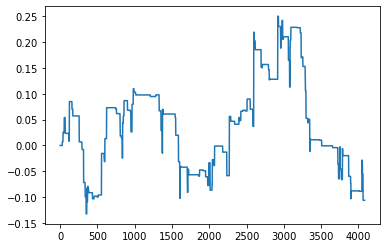

In [219]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_avg"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_avg"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_avg"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 155
profit: -0.13794961941842013
count    4082.000000
mean       -0.000027
std         0.006864
min        -0.064556
25%         0.000000
50%         0.000000
75%         0.000000
max         0.169995
Name: profit, dtype: float64
ROI (%): -3.5024528984862524


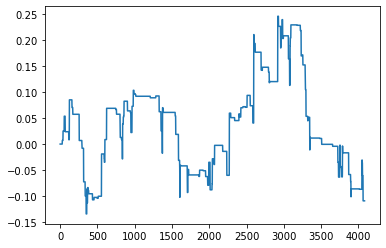

In [222]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_bet365"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_bet365"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_bet365"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 152
profit: 0.1488441771941224
count    4082.000000
mean        0.000029
std         0.007211
min        -0.060060
25%         0.000000
50%         0.000000
75%         0.000000
max         0.208117
Name: profit, dtype: float64
ROI (%): 4.0286758503123465


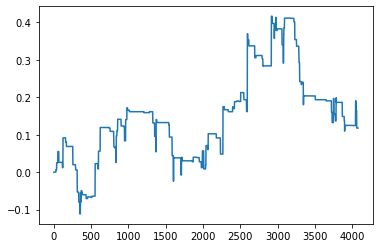

In [220]:
exog_vars = train_data[["inv_avg","rankdist","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],x["rankdist"],x["wikibuzz"],0,0,odds,rankdist,wikibuzz,googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))


no of bets: 87
profit: -0.11368023003732615
count    4082.000000
mean       -0.000022
std         0.002570
min        -0.042026
25%         0.000000
50%         0.000000
75%        -0.000000
max         0.055975
Name: profit, dtype: float64
ROI (%): -9.61684730863711


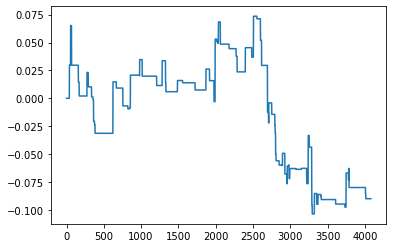

In [221]:
exog_vars = train_data[["inv_avg","googlebuzz","wikibuzz"]]
exog = sm.add_constant(exog_vars)
model = PanelOLS(train_data["win"],exog,entity_effects=False,other_effects=train_data["year"])
results = model.fit()
x = results.params
test_data["avg_prob"] = [probability(x["const"],x["inv_avg"],0,x["wikibuzz"],0,0,odds,0,wikibuzz,googlebuzz) for odds,rankdist,wikibuzz,googlebuzz in zip(test_data["inv_max"],test_data["rankdist"],test_data["wikibuzz"],test_data["googlebuzz"])]
test_data["kelly"] = [kelly_crit(kelly[0],kelly[1]) for kelly in zip(test_data["avg_prob"],test_data["inv_max"])]
test_data["profit"] = [profit(prof[0],prof[1],prof[2]) for prof in zip(test_data["kelly"],test_data["inv_max"],test_data["win"])]
test_data["profit"].describe()
print()
print("no of bets: " + str(len(test_data["profit"])-(test_data["profit"]== 0).sum()))
print("profit: " + str((5160*test_data["profit"].mean())))
plt.plot(list(test_data["profit"].cumsum()))
print(test_data["profit"].describe())
print("ROI (%): "+str((((test_data["profit"].sum() + test_data["kelly"].sum())/test_data["kelly"].sum())-1)*100))